In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['marathon_results_2017.csv']


In [72]:
marathon_data = pd.read_csv('../input/marathon_results_2017.csv')

In [73]:
marathon_data['Official Time'].describe()

count       26410
unique       9269
top       3:56:25
freq           13
Name: Official Time, dtype: object

In [93]:
males = marathon_data[marathon_data['M/F'] == 'M']
females = marathon_data[marathon_data['M/F'] == 'F']

def total_seconds(duration):
    h, m, s = duration.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

def to_hms(seconds):
    s = int(seconds)
    h = s // 3600
    m = (s - h * 3600) // 60
    s = (s - h * 3600 - m * 60)
    return f'{h:02}:{m:02}:{s:02}'

def to_hm(seconds):
    return to_hms(seconds)[:-3]

In [75]:
bad = []
for i in range(20000):
    r = total_seconds(to_hms(i))
    if i != r:
        bad.append(i)
bad

[]

In [76]:
male_times = males['Official Time'].apply(total_seconds).sort_values()
female_times = females['Official Time'].apply(total_seconds).sort_values()

In [77]:
male_times.describe()

count    14438.000000
mean     13734.688392
std       2572.342401
min       7777.000000
25%      11847.000000
50%      13281.500000
75%      15181.250000
max      28694.000000
Name: Official Time, dtype: float64

In [79]:
percentiles = [0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1]
male_percentiles = male_times.quantile(percentiles)
female_percentiles = female_times.quantile(percentiles)

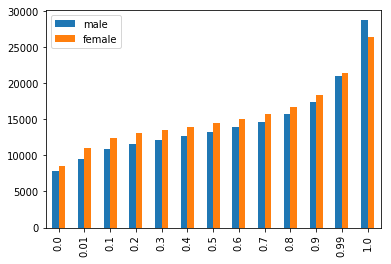

In [87]:
combined = pd.DataFrame({'male': male_percentiles, 'female': female_percentiles})

ax = combined.plot.bar()

In [94]:
all_percentiles = pd.concat([male_percentiles.apply(to_hm), female_percentiles.apply(to_hm)], axis=1)
all_percentiles.columns = ['Male', 'Female']
all_percentiles

,Male,Female
0.00,02:09,02:21
0.01,02:38,03:03
0.10,03:00,03:27
0.20,03:12,03:37
0.30,03:22,03:45
0.40,03:31,03:53
0.50,03:41,04:00
0.60,03:51,04:10
0.70,04:04,04:22
0.80,04:22,04:39
